# **Heart Disease Prediction using Machine Learning**

The dataset used in this project is the Heart Disease dataset:
www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

## Dataset Features

The dataset contains the following attributes:

1. **age** – Age in years
2. **sex** – Gender

   * `1`: Male
   * `0`: Female
3. **cp** – Chest pain type

   * `0`: Typical angina → chest pain related to reduced blood supply to the heart
   * `1`: Atypical angina → chest pain not related to the heart
   * `2`: Non-anginal pain → often esophageal spasms (non-heart related)
   * `3`: Asymptomatic → no chest pain but possible disease
4. **trestbps** – Resting blood pressure (mm Hg) on admission to the hospital

   * Anything above **130–140 mm Hg** is typically a concern
5. **chol** – Serum cholesterol (mg/dl)

   * Formula: LDL + HDL + 0.2 × triglycerides
   * Above **200 mg/dl** is cause for concern
6. **fbs** – Fasting blood sugar (>120 mg/dl)

   * `1`: True
   * `0`: False
   * Values `>126 mg/dl` may signal diabetes
7. **restecg** – Resting electrocardiographic results

   * `0`: Normal
   * `1`: ST-T wave abnormality → ranges from mild to severe, indicates irregular heartbeat
   * `2`: Left ventricular hypertrophy → enlarged heart’s main pumping chamber
8. **thalach** – Maximum heart rate achieved
9. **exang** – Exercise-induced angina

   * `1`: Yes
   * `0`: No
10. **oldpeak** – ST depression induced by exercise relative to rest

    * Measures heart stress during exercise (higher values = more stress)
11. **slope** – Slope of the peak exercise ST segment

    * `0`: Upsloping → uncommon, better heart rate with exercise
    * `1`: Flatsloping → typical for healthy heart
    * `2`: Downsloping → indicates unhealthy heart
12. **ca** – Number of major vessels (0–3) colored by fluoroscopy

    * Colored vessel = visible blood flow (healthy)
    * More visible vessels = better blood circulation, fewer clots
13. **thal** – Thallium stress test result

    * `1` or `3`: Normal
    * `6`: Fixed defect → past issue, now resolved
    * `7`: Reversible defect → reduced blood movement during exercise
14. **target** – Presence of heart disease (predicted attribute)

    * `1`: Disease present
    * `0`: No disease

# 1. Data Collection

## 1.1. Import Libraries

In [1]:
import numpy as np     # linear algebra
import pandas as pd    # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # data visualization

## 1.2. Read the dataset

In [2]:
# load the dataset into a pandas dataframe
df = pd.read_csv(r'C:\Users\erdem\OneDrive - Ontario Tech University\Desktop\Data Science Projects\Completed projects\Heart Disease\heart_disease_data.csv')

## 1.3. Understand the data

In [3]:
# display first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# display last 10 rows
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# check the number of rows and columns
df.shape

(303, 14)

In [6]:
# check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# statistical measures of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# display what unique value in target column
df['target'].unique()

array([1, 0])

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<Axes: ylabel='Frequency'>

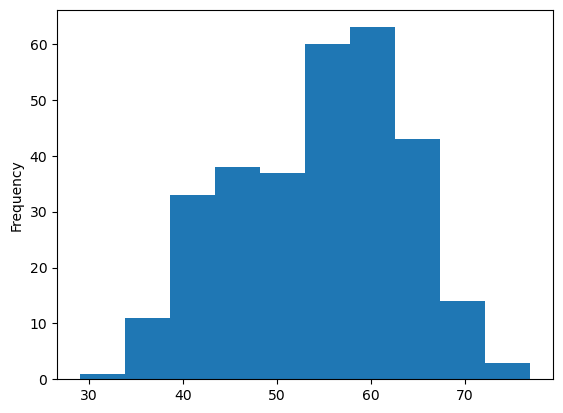

In [11]:
df.age.plot.hist()

### 1 --> Defective Heart
### 0 --> Healthy Heart

In [12]:
# display how many different values are in each unique value
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [13]:
# see mean unique values for each columns
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


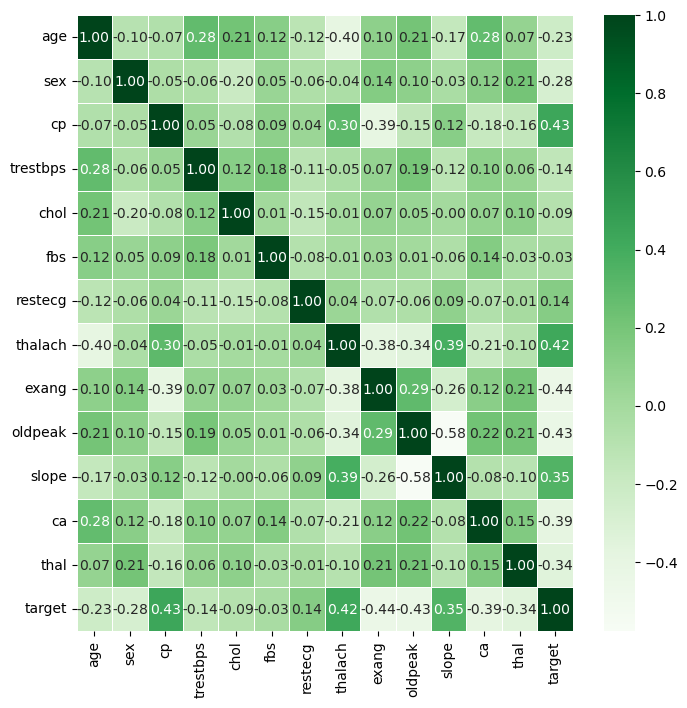

In [15]:
plt.figure(figsize=(8, 8))
corr_matrix = df.corr()
ax = sns.heatmap(corr_matrix, annot =True, linewidth=0.5, fmt = ".2f", cmap = "Greens")


In [16]:
# separating dependent and independent data
X = df.drop(columns='target', axis=1)
y = df['target']

# 2. Machine Learning

## 2.1. Training and Test Data

test_size=0.2, 20% of dataset goes to test set, 80% to training

stratify=y, keeps the same ratio of classes in both training and test sets (very important for classification)

random_state=2      # ensures reproducibility, controls randomness

If you set it (e.g., 1), you’ll always get the same split each time you run the code. This is good for reproducibility.

If you leave it as default (None), the split will change every time you run the code (since it uses system time as the seed).

In [17]:
# library for splitting data
from sklearn.model_selection import train_test_split

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## 2.2. Model Training

### 2.2.1. Logistic Regression

In [19]:
# library for Ml model
from sklearn.linear_model import LogisticRegression

# set up machine learning model
model_log_reg = LogisticRegression()

# training the Logistic Regression model with training data
model_log_reg.fit(X_train,y_train)

C:\Users\erdem\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 2.3. Model Evaluation

In [20]:
# library to evaluate model
from sklearn.metrics import accuracy_score

# accuracy on training data
X_train_prediction = model_log_reg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on training data: ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model_log_reg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on test data: ' , test_data_accuracy)

Accuracy on training data:  0.8512396694214877
Accuracy on test data:  0.819672131147541


# 3. Predictive System

In [21]:
input_data = (37,1,3,145,233,1,0,150,0,2.3,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_log_reg.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\erdem\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
if (prediction[0]==0):
    print('The person does not have a heart disease.')
else:
    print('The person has a heart disease.')

The person has a heart disease.


# 4. Model Deploying

## 4.1. Save the trained model

In [23]:
import pickle  # library for saving and loading the model

# save the trained model
filename = 'trained_model_heart_disease.sav'
pickle.dump(model_log_reg, open(filename, 'wb'))

# load the saved model
loaded_model = pickle.load(open('trained_model_heart_disease.sav', 'rb'))